Outlier detection and removal using z-score and standard deviation in python pandas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
df=pd.read_csv('heights.csv')
df.sample(5)

,gender,height
2058,Male,67.918646
949,Male,74.545137
7489,Female,60.228592
308,Male,65.420577
939,Male,68.581374


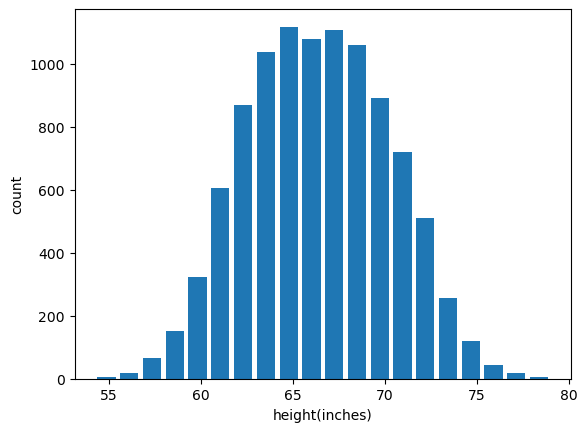

In [7]:
plt.hist(df.height,bins=20,rwidth=0.8)
plt.xlabel('height(inches)')
plt.ylabel('count')
plt.show()

plotting bell curve along with histogram 

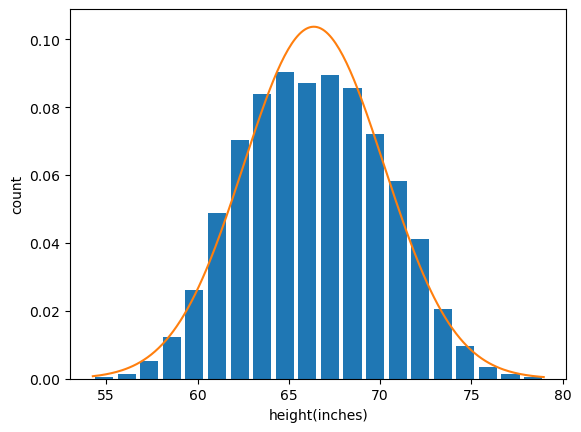

In [10]:
from scipy.stats import norm
import numpy as np
plt.hist(df.height,bins=20,rwidth=0.8,density=True)
plt.xlabel('height(inches)')
plt.ylabel('count')

rng=np.arange(df.height.min(),df.height.max(),0.1)
plt.plot(rng ,norm.pdf(rng,df.height.mean(),df.height.std()))

In [11]:
df.height.mean()

66.367559754866

In [12]:
df.height.std()

3.847528120795573

Here the mean is 66.37 and standard deviation is 3.84.

# (1) Outlier detection and removal using 3 standard deviation
One of the ways we can remove outliers is remove any data points that are beyond 3 standard deviation from mean. Which means we can come up with following upper and lower bounds

In [14]:
upper_limit=df.height.mean() +3*df.height.std()
upper_limit

77.91014411725271

In [18]:
lower_limit=d.height.mean() - 3*d.height.std()
lower_limit

54.824975392479274

In [19]:
df[(d.height>upper_limit) | (df.height<lower_limit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


Now remove these outliers and generate new dataframe

In [20]:
df_no_outlier_std_dev = df[(d.height < upper_limit) & (d.height > lower_limit)]
df_no_outlier_std_dev.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [21]:
df_no_outlier_std_dev.shape

(9993, 2)

In [22]:
df.shape

(10000, 2)

# (2) Outlier detection and removal using Z Score

Z score is a way to achieve same thing that we did above in part (1)

Z score indicates how many standard deviation away a data point is.

For example in our case mean is 66.37 and standard deviation is 3.84.

If a value of a data point is 77.91 then Z score for that is 3 because it is 3 standard deviation away (77.91 = 66.37 + 3 * 3.84)

calculate Z-score

z-score = x - mean / standard deviation

In [23]:
df['zscore']=(df.height -df.height.mean()) / df.height.std()
d.head(5)

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


Above for first record with height 73.84, z score is 1.94. This means 73.84 is 1.94 standard deviation away from mean

In [24]:
(73.84-66.37)/3.84

1.9453124999999998

Get data points that has z score higher than 3 or lower than -3. Another way of saying same thing is get data points that are more than 3 standard deviation away

In [26]:
df[df.zscore>3]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [28]:
df[df.zscore < -3]

,gender,height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [30]:
df[(df.zscore < -3) | (df.zscore > 3)]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


Remove the outliers and produce new dataframe

In [31]:
df_no_outliers = df[(df.zscore>-3) & (df.zscore<3)]
df_no_outliers.head()

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [32]:
df_no_outliers.shape

(9993, 3)

In [34]:
df.shape

(10000, 3)

Above shows original dataframe data 10000 data points. Out of that we removed 7 outliers (i.e. 10000-9993)